## Install required libraries

In [ ]:
!pip install matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

## Import required libraries

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets

## Change settings

In [3]:
# Warning display off
import warnings
warnings.simplefilter('ignore')

# Change default font size
plt.rcParams['font.size'] = 14

# Change default graph size
plt.rcParams['figure.figsize'] = (6,6)

# Square indicate ON
plt.rcParams['axes.grid'] = True

# Set precision of floating-point numbers in numpy
np.set_printoptions(suppress=True, precision=5)

## GPU utilization

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Read of Common Functions

In [ ]:
# Download common functions
!git clone https://github.com/nobu1/PyTorch_Project.git

# Load common functions
from PyTorch_Project.torch_lib1 import *

# Check common function
print(README)

## Prepare for the dataset

In [6]:
# Training data
transform_train = transforms.Compose([
  transforms.Resize(112),
  # Randomly flip left and right
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5),
  # Randomly delete rectangular areas
  transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

# Validation data
transform = transforms.Compose([
  transforms.Resize(112),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

# Define correct answer label
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Dimension of output
n_output = len(classes)

In [ ]:
data_root = './data'

# Get the training data
train_set = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform_train)

# Get the validation data
test_set = datasets.CIFAR10(
    root = data_root, train = False,
    download = True, transform = transform)

In [8]:
# Specify the batch size
batch_size = 50

# Training Data Loader (Since it's for training, shuffle the data)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

# Data Loader for Validation (Shuffling is not required during validation)
test_loader = DataLoader(test_set,  batch_size=batch_size, shuffle=False)

## Loading ResNet-18

In [ ]:
from torchvision import models

# Loading a pre-trained model
# pretraind = True: Load the pre-trained parameters together
net = models.resnet18(pretrained = True)

## Prepare for the ResNet-18 calculation

In [11]:
# Learning rate
lr = 0.001

# Random number fixing
torch_seed()

# Create predict function
# pretraind = True: Load the pre-trained parameters together
net = models.resnet18(pretrained = True)

# Final Layer Function Replacement
fc_in_features = net.fc.in_features
net.fc = nn.Linear(fc_in_features, n_output)

# Transfer to GPU
net = net.to(device)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function
# For pre-trained models, it is preferable to select a simple algorithm, such as optim.SGD.
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# Repetition counts
num_epochs = 5

# Record evaluation results
history = np.zeros((0, 5))

## Execute image recognition of ResNet-18

In [ ]:
history = fit(net, optimizer, criterion, num_epochs,
        train_loader, test_loader, device, history)

## Confirm the loss values and accuracies and display the learning curve

Initial: Loss: 0.26333 Accuracy: 0.90870
Final: Loss: 0.17820 Accuracy: 0.94090


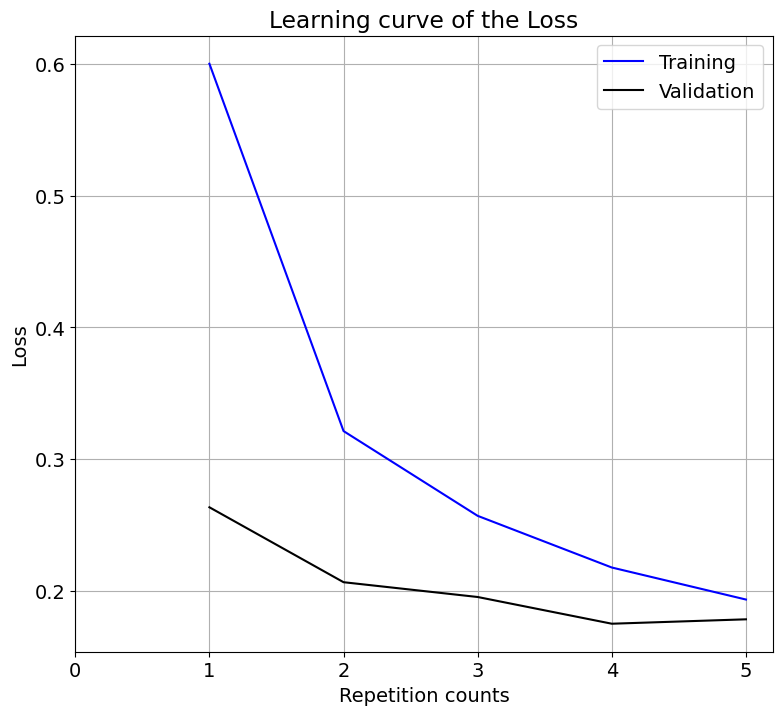

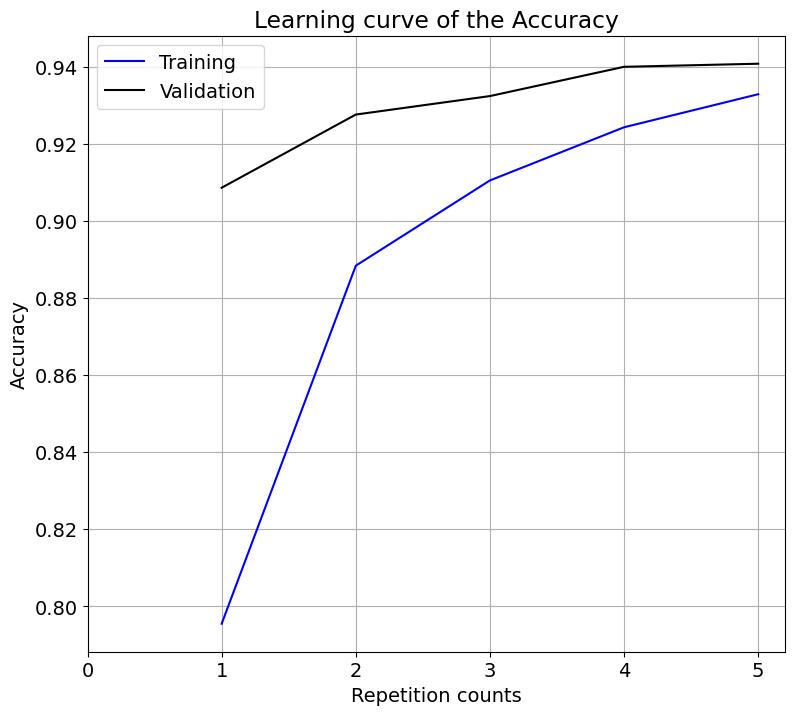

In [13]:
evaluate_history(history)

- Approximately a 3% improvement in accuracy is observed after just five iterations.

## Loading VGG-19-BN

In [ ]:
from torchvision import models
net = models.vgg19_bn(pretrained = True)

## Prepare for the VGG-19-BN calculation

In [15]:
# Learning rate
lr = 0.001

# Random number fixing
torch_seed()

# Create predict function
net = models.vgg19_bn(pretrained = True)

# Final Layer Function Replacement
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, n_output)

# Remove the last MaxPool2d
net.features = net.features[:-1]

# Remove AdaptiveAvgPool2d
net.avgpool = nn.Identity()

# Transfer to GPU
net = net.to(device)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function
# For pre-trained models, it is preferable to select a simple algorithm, such as optim.SGD.
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# Repetition counts
num_epochs = 5

# Record evaluation results
history = np.zeros((0, 5))

## Execute image recognition of VGG-19-BN

In [ ]:
history = fit(net, optimizer, criterion, num_epochs,
          train_loader, test_loader, device, history)

## Confirm the loss values and accuracies and display the learning curve

Initial: Loss: 0.18972 Accuracy: 0.93460
Final: Loss: 0.12609 Accuracy: 0.95700


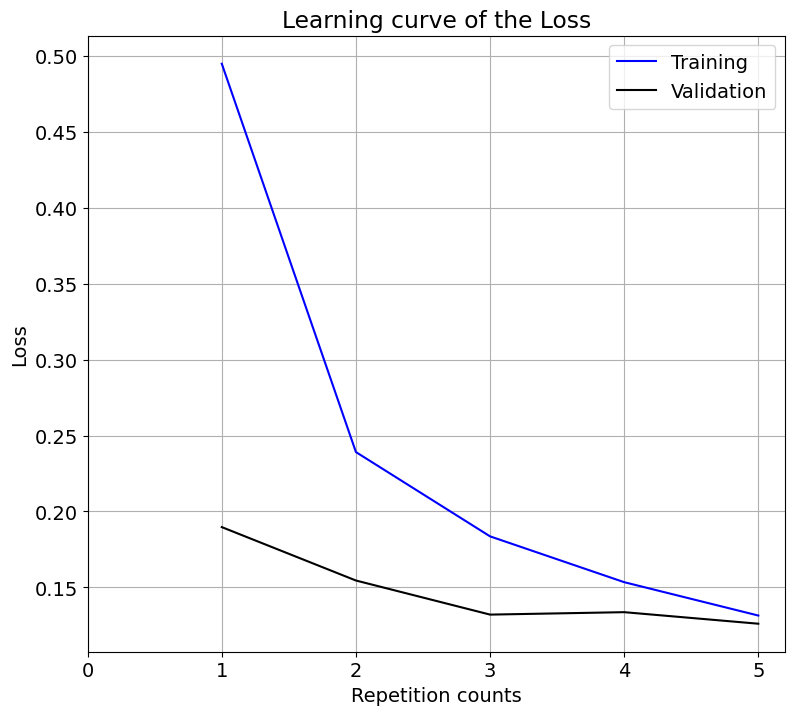

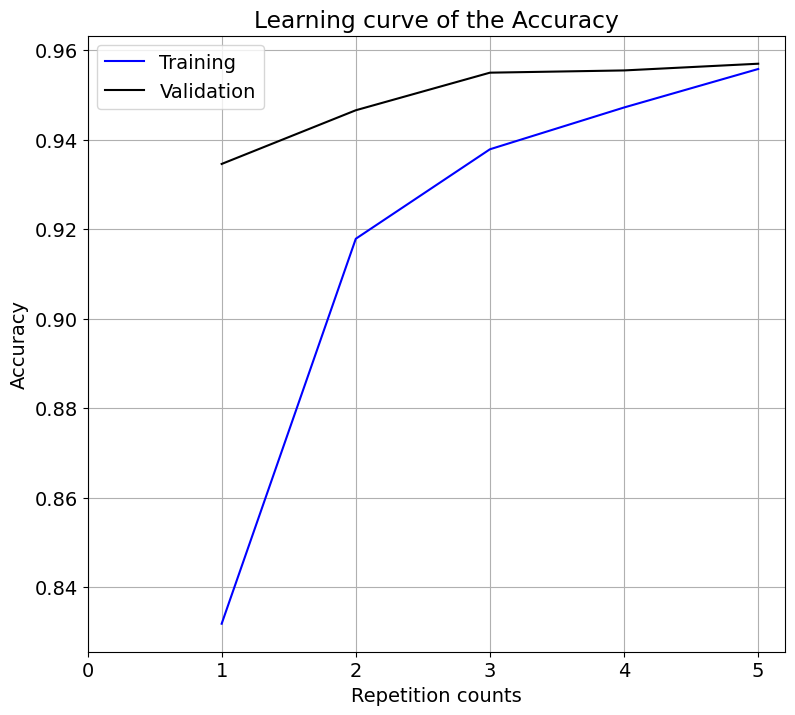

In [17]:
evaluate_history(history)

- The model gets about 96% accuracy with 5 iterations.